In [16]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [17]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model & preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, f1_score
)
from sklearn.utils.class_weight import compute_class_weight

plt.rcParams['figure.dpi'] = 140
np.random.seed(42)

In [18]:
# Update path for your Mac
PATH = "/Users/ahlayahblain/Downloads/predictive_maintenance.csv"

# Load the dataset
df = pd.read_csv(PATH)

# Display first few rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [19]:
# Dataset shape and info
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Quick summary statistics
display(df.describe(include='all').T)

# Identify potential target columns
target_cols = [c for c in df.columns if 'failure' in c.lower()]
print("\nPossible target columns:", target_cols)

Shape: (10000, 10)

Data types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Missing values per column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
Failure Type,10000,6,No Failure,9652,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Possible target columns: ['Failure Type']


In [20]:
# Drop identifiers that don't help prediction
df_clean = df.drop(columns=['UDI', 'Product ID'], errors='ignore').copy()

# Binary target: "Target" (1 = Failure, 0 = No Failure)
y = df_clean['Target'].astype(int)
X = df_clean.drop(columns=['Target', 'Failure Type'], errors='ignore')

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print("\nTarget balance:\n", y.value_counts(normalize=True).round(4))

Numeric columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Categorical columns: ['Type']

Target balance:
 Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64


Decision Tree Performance:
              precision    recall  f1-score   support

           0      0.987     0.991     0.989      1932
           1      0.712     0.618     0.661        68

    accuracy                          0.979      2000
   macro avg      0.849     0.804     0.825      2000
weighted avg      0.977     0.979     0.978      2000



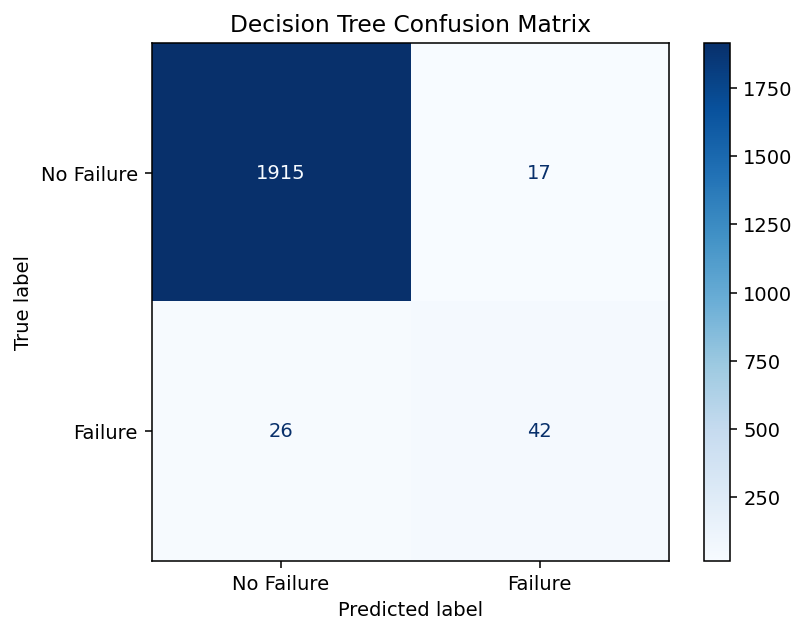


Random Forest Performance:
              precision    recall  f1-score   support

           0      0.982     0.999     0.990      1932
           1      0.941     0.471     0.627        68

    accuracy                          0.981      2000
   macro avg      0.961     0.735     0.809      2000
weighted avg      0.980     0.981     0.978      2000



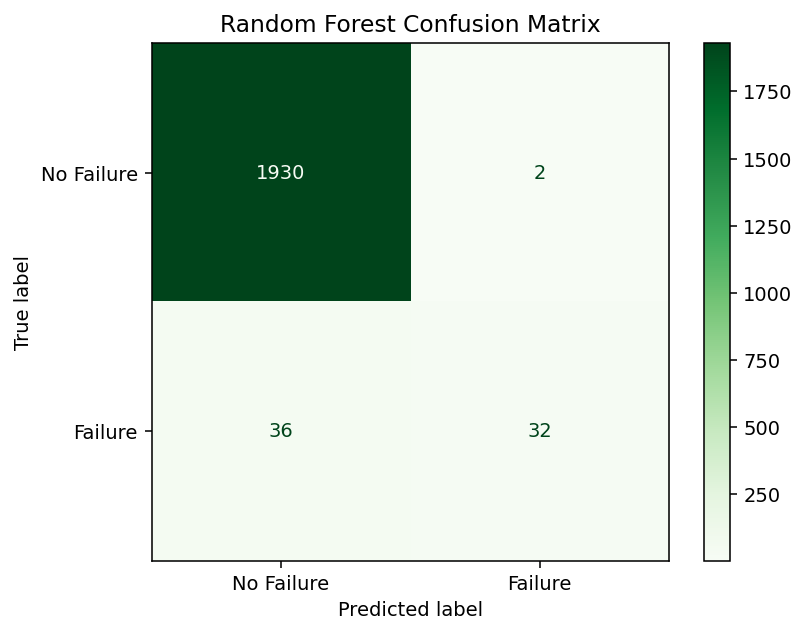

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

#Model 1: Decision Tree
dt_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt, digits=3))

cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Failure", "Failure"]).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

#Model 2: Random Forest
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Failure", "Failure"]).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# Parameter grids
dt_params = {
    'model__max_depth': [3, 5, 8, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearch for Decision Tree
dt_grid = GridSearchCV(dt_pipe, dt_params, scoring='recall', cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best CV Recall:", dt_grid.best_score_)

# GridSearch for Random Forest
rf_grid = GridSearchCV(rf_pipe, rf_params, scoring='recall', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best CV Recall:", rf_grid.best_score_)

Best Decision Tree Parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
Best CV Recall: 0.8966329966329966

Best Random Forest Parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best CV Recall: 0.8485521885521885


Tuned Decision Tree Performance:

              precision    recall  f1-score   support

  No Failure       0.98      1.00      0.99      1932
     Failure       0.78      0.31      0.44        68

    accuracy                           0.97      2000
   macro avg       0.88      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000

ROC-AUC: 0.929458196322007


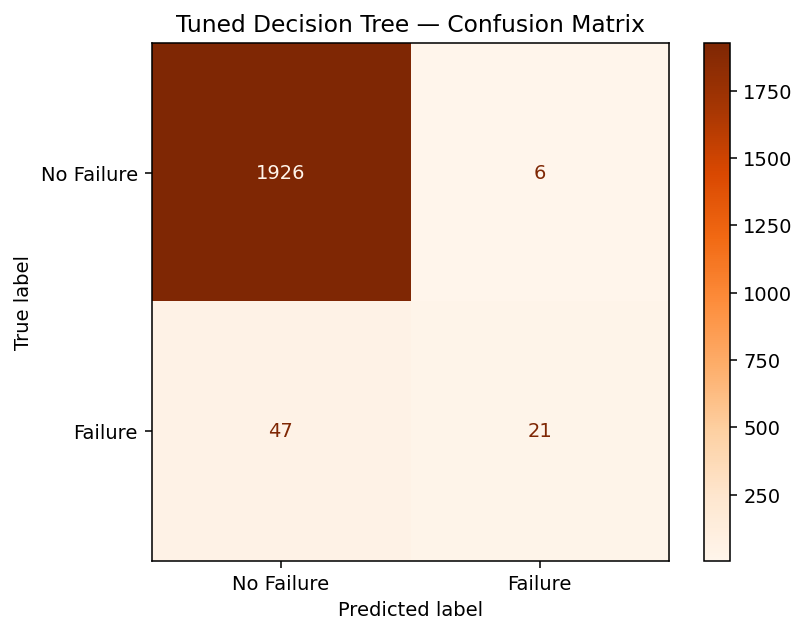

In [23]:
#Retraining and Final Evaluation of Tuned Decision Tree

# Apply best parameters
best_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# Recreate pipeline with scaling and encoding
best_dt_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_dt)
])

# Fit the tuned model
best_dt_pipe.fit(X_train, y_train)

# Predictions and probabilities
y_pred_best = best_dt_pipe.predict(X_test)
y_prob_best = best_dt_pipe.predict_proba(X_test)[:, 1]

# Evaluate metrics
print("Tuned Decision Tree Performance:\n")
print(classification_report(y_test, y_pred_best, target_names=["No Failure", "Failure"]))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=["No Failure", "Failure"])
disp.plot(cmap="Oranges", values_format='d')
plt.title("Tuned Decision Tree — Confusion Matrix")
plt.show()

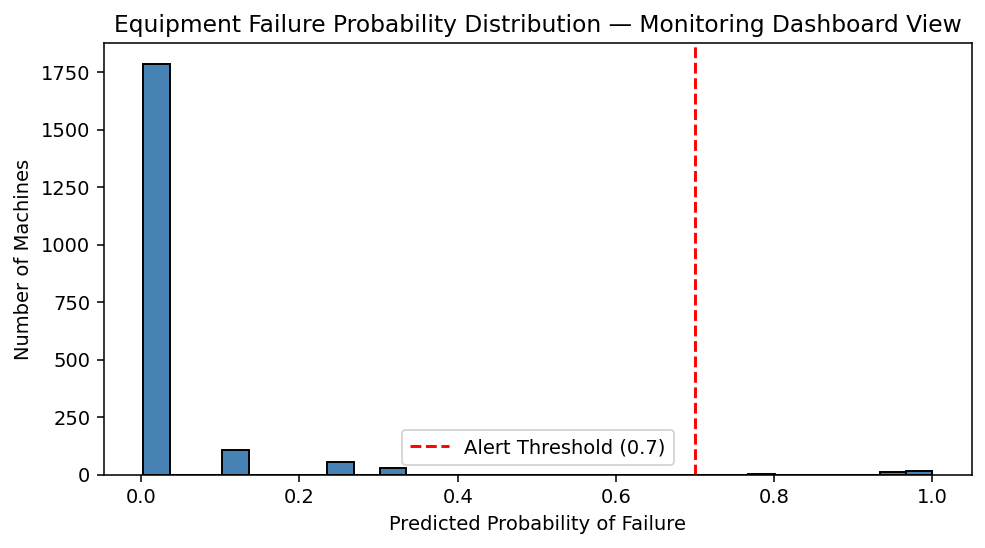

In [24]:
#Dashboard Simulation: Probability Monitoring

import matplotlib.pyplot as plt

# Use predicted probabilities from the tuned model
y_prob = y_prob_best  

plt.figure(figsize=(8,4))
plt.hist(y_prob, bins=30, color='steelblue', edgecolor='black')
plt.axvline(0.7, color='red', linestyle='--', label='Alert Threshold (0.7)')
plt.title("Equipment Failure Probability Distribution — Monitoring Dashboard View")
plt.xlabel("Predicted Probability of Failure")
plt.ylabel("Number of Machines")
plt.legend()
plt.show()